In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

### 1. 데이터 불러오기
- 경로 : /home/ubuntu/drive/SAM/merged_final.csv

In [2]:
data = pd.read_csv("/home/ubuntu/drive/SAM/merged_final.csv", encoding="UTF-8")
data

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
cdata = data.copy()

In [ ]:
cdata.head()

,Unnamed: 0,check_datetime,측정일자,구역명,farm_code,내부온도,내부습도,내부CO2,근권온도,내부순간일사량,...,bbox_image_path,before_img_name,before_img_id,mask_num,mask_id,point_x,point_y,size,color,output_image_path
0,58758,2021-09-10 13:00:00,2021-09-10,1구역,F0016,27.52,72.22,467.9,22.51,223.17,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20210910-075908,283f919417b3c53b4089683ba1cf7ca2,F0016-C101-20210910-125907_0,065e7a9bdd5065fe01976ff3f4f49f03,1132.451172,554.744629,535,"[[121, 123, 112], [123, 125, 114], [118, 120, ...",image_mask_0.png
1,58758,2021-09-10 13:00:00,2021-09-10,1구역,F0016,27.52,72.22,467.9,22.51,223.17,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20210910-075908,283f919417b3c53b4089683ba1cf7ca2,F0016-C101-20210910-125907_1,c8f4ef001e5f686be96b1cb1bb68f68d,880.826233,100.000298,37040,"[[54, 63, 44], [88, 97, 76], [82, 91, 70], [85...",image_mask_1.png
2,58782,2021-09-10 17:00:00,2021-09-10,1구역,F0016,27.02,71.23,463.1,23.77,102.75,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20210910-125907,d45f2f28bf7fb63dda831452e8442386,F0016-C101-20210910-165907_0,065e7a9bdd5065fe01976ff3f4f49f03,1136.085205,556.137573,576,"[[70, 71, 65], [68, 69, 63], [63, 64, 58], [49...",image_mask_0.png
3,58782,2021-09-10 17:00:00,2021-09-10,1구역,F0016,27.02,71.23,463.1,23.77,102.75,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20210910-125907,d45f2f28bf7fb63dda831452e8442386,F0016-C101-20210910-165907_1,3cf79ada342fb0b16364c9ea6d703f9f,771.131104,102.249115,20098,"[[22, 24, 10], [27, 30, 11], [42, 45, 24], [35...",image_mask_1.png
4,58782,2021-09-10 17:00:00,2021-09-10,1구역,F0016,27.02,71.23,463.1,23.77,102.75,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20210910-125907,d45f2f28bf7fb63dda831452e8442386,F0016-C101-20210910-165907_2,fd48e0393a4d25876b5fb82e9571361e,902.543579,109.905945,22199,"[[97, 93, 92], [80, 79, 77], [85, 84, 80], [83...",image_mask_2.png


In [ ]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134330 entries, 0 to 134329
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         134330 non-null  int64  
 1   check_datetime     132584 non-null  object 
 2   측정일자               132584 non-null  object 
 3   구역명                132584 non-null  object 
 4   farm_code          134330 non-null  object 
 5   내부온도               132584 non-null  float64
 6   내부습도               132584 non-null  float64
 7   내부CO2              132584 non-null  float64
 8   근권온도               132584 non-null  float64
 9   내부순간일사량            132584 non-null  float64
 10  측정년도               132584 non-null  float64
 11  측정월                132584 non-null  float64
 12  input_image_name   134330 non-null  object 
 13  input_image_path   134330 non-null  object 
 14  img_id             134330 non-null  object 
 15  area_code          134330 non-null  object 
 16  sh

In [ ]:
cdata.describe()

,Unnamed: 0,내부온도,내부습도,내부CO2,근권온도,내부순간일사량,측정년도,측정월,count_masks,point_x,point_y,size
count,134330.000000,132584.000000,132584.000000,132584.000000,132584.000000,132584.000000,132584.000000,132584.000000,134330.000000,134330.000000,134330.000000,134330.000000
mean,269230.262793,19.141740,72.988144,771.722609,15.742509,145.061465,2022.563047,3.849793,64.101422,1223.711793,406.793924,2276.061810
std,119485.783577,5.582866,17.781266,752.048862,2.823580,132.604521,0.812655,3.304336,29.223869,690.399460,219.650029,7673.211729
min,58758.000000,7.820000,23.210000,149.900000,10.510000,0.000000,2021.000000,1.000000,1.000000,5.069072,3.000226,0.000000
25%,136779.000000,14.820000,58.200000,398.900000,13.860000,39.430000,2022.000000,2.000000,42.000000,657.560486,255.427425,640.000000
50%,312206.000000,19.130000,76.930000,445.200000,15.080000,110.580000,2022.000000,3.000000,67.000000,1188.767395,406.228439,1167.000000
75%,365054.000000,22.630000,89.350000,792.300000,16.870000,206.830000,2023.000000,4.000000,86.000000,1789.307159,521.223724,2223.000000
max,421398.000000,56.470000,98.890000,6484.600000,37.180000,781.820000,2024.000000,12.000000,144.000000,2556.066406,1426.772705,447704.000000


In [ ]:
### unnamed column 삭제
cdata.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
cdata.columns

Index(['check_datetime', '측정일자', '구역명', 'farm_code', '내부온도', '내부습도', '내부CO2',
       '근권온도', '내부순간일사량', '측정년도', '측정월', 'input_image_name',
       'input_image_path', 'img_id', 'area_code', 'shot_datetime',
       'count_masks', 'bbox_image_path', 'before_img_name', 'before_img_id',
       'mask_num', 'mask_id', 'point_x', 'point_y', 'size', 'color',
       'output_image_path'],
      dtype='object')

### 2. mask info 잘못된 부분 수정
- mask_info 저장 과정에서 mask num이 +1이 되어야 하는데, 이부분이 안됨
- mask_info 마지막 값만 추출해서 +1 한 후 수정된 파일로 재저장

In [ ]:
import re  
# 정규표현식 패턴
pattern = re.compile(r'\d+$')
### mask_num 전처리
for idx, mask in enumerate(cdata["mask_num"]):
  # 숫자 추출
  match = re.search(pattern, mask)
  if match:
    number = int(match.group()) + 1
    cdata.iloc[idx, 20] = re.sub(pattern, str(number), mask)



In [ ]:
print(cdata["mask_num"])

0          F0016-C101-20210910-125907_1
1          F0016-C101-20210910-125907_2
2          F0016-C101-20210910-165907_1
3          F0016-C101-20210910-165907_2
4          F0016-C101-20210910-165907_3
                      ...              
134325    F0017-C101-20240403-084305_33
134326    F0017-C101-20240403-084305_34
134327    F0017-C101-20240403-084305_35
134328    F0017-C101-20240403-084305_36
134329    F0017-C101-20240403-084305_37
Name: mask_num, Length: 134330, dtype: object


In [ ]:
### output_image_path 전처리
### 정규표현식 패턴
pattern = re.compile(r'(\d+)(?=\.\w+$)')
for idx, path in enumerate(cdata["output_image_path"]):
  # 숫자 추출
  match = re.search(pattern, path)
  if match:
    number = int(match.group()) + 1
    cdata.iloc[idx, -1] = re.sub(pattern, str(number), path)
    


In [ ]:
print(cdata["output_image_path"])

0          image_mask_1.png
1          image_mask_2.png
2          image_mask_1.png
3          image_mask_2.png
4          image_mask_3.png
                ...        
134325    image_mask_33.png
134326    image_mask_34.png
134327    image_mask_35.png
134328    image_mask_36.png
134329    image_mask_37.png
Name: output_image_path, Length: 134330, dtype: object


In [ ]:
cdata.to_csv("merged_final.csv", encoding="UTF-8")

### 3. 다시 EDA 진행

In [66]:
### 일부만 추출하여 확인했을 때 센서데이터와 이미지 자체는 잘 매핑된 것을 확인할 수 있음
cdata.loc[:5, ["check_datetime", "input_image_name", "before_img_name"]]

,check_datetime,input_image_name,before_img_name
0,2021-09-10 13:00:00,F0016-C101-20210910-125907,F0016-C101-20210910-075908
1,2021-09-10 13:00:00,F0016-C101-20210910-125907,F0016-C101-20210910-075908
2,2021-09-10 17:00:00,F0016-C101-20210910-165907,F0016-C101-20210910-125907
3,2021-09-10 17:00:00,F0016-C101-20210910-165907,F0016-C101-20210910-125907
4,2021-09-10 17:00:00,F0016-C101-20210910-165907,F0016-C101-20210910-125907
5,2021-09-10 17:00:00,F0016-C101-20210910-165907,F0016-C101-20210910-125907


##### 1) 221106 16시 - 221107 8시 비교

In [67]:
### 2022년 11월 데이터 추출해서 확인하기
nov = cdata[(cdata["측정년도"] == 2022) & (cdata["측정월"] == 11)]
nov.head(5)

,check_datetime,측정일자,구역명,farm_code,내부온도,내부습도,내부CO2,근권온도,내부순간일사량,측정년도,...,bbox_image_path,before_img_name,before_img_id,mask_num,mask_id,point_x,point_y,size,color,output_image_path
24871,2022-11-01 08:40:00,2022-11-01,1구역,F0016,17.65,85.93,565.7,15.88,162.1,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221031-163737,09275a663a4872b402ccad96772b5e69,F0016-C101-20221101-083913_1,f3aa3a898151acb30952974a1896fbd5,1193.431396,264.655701,2617,"[[70, 81, 41], [85, 96, 56], [93, 104, 61], [1...",image_mask_1.png
24872,2022-11-01 08:40:00,2022-11-01,1구역,F0016,17.65,85.93,565.7,15.88,162.1,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221031-163737,09275a663a4872b402ccad96772b5e69,F0016-C101-20221101-083913_2,9614e12c60edfc72be795bd94ef52026,880.256958,421.433014,755,"[[103, 106, 77], [116, 119, 90], [127, 130, 10...",image_mask_2.png
24873,2022-11-01 08:40:00,2022-11-01,1구역,F0016,17.65,85.93,565.7,15.88,162.1,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221031-163737,09275a663a4872b402ccad96772b5e69,F0016-C101-20221101-083913_3,fbd5a41a368754cd076f200ccaacf644,834.278015,424.968628,719,"[[125, 133, 109], [100, 108, 84], [66, 74, 50]...",image_mask_3.png
24874,2022-11-01 08:40:00,2022-11-01,1구역,F0016,17.65,85.93,565.7,15.88,162.1,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221031-163737,09275a663a4872b402ccad96772b5e69,F0016-C101-20221101-083913_4,228e6c4111686c6b760724dd2429bac1,1158.881104,282.200317,515,"[[40, 46, 10], [81, 82, 50], [75, 74, 43], [17...",image_mask_4.png
24875,2022-11-01 08:40:00,2022-11-01,1구역,F0016,17.65,85.93,565.7,15.88,162.1,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221031-163737,09275a663a4872b402ccad96772b5e69,F0016-C101-20221101-083913_5,f49ee901ca62d4b04cc909ba9780db07,721.626709,457.565430,965,"[[22, 31, 4], [101, 110, 83], [44, 50, 24], [4...",image_mask_5.png


In [77]:
### 전후 딸기 매핑이 잘 되었는지 확인하기 위한 데이터 추출 (20221107 8시 사진)
nov1 = nov[nov["before_img_name"] == "F0016-C101-20221106-163604"]
nov1

,check_datetime,측정일자,구역명,farm_code,내부온도,내부습도,내부CO2,근권온도,내부순간일사량,측정년도,...,bbox_image_path,before_img_name,before_img_id,mask_num,mask_id,point_x,point_y,size,color,output_image_path
25078,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-163604,18e669c89a2c5d9286c7ad81611297f5,F0016-C101-20221107-083623_1,56402d4079efde4732439a74fd03c575,463.241516,76.192635,2342,"[[51, 60, 57], [51, 60, 57], [52, 61, 58], [53...",image_mask_1.png
25079,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-163604,18e669c89a2c5d9286c7ad81611297f5,F0016-C101-20221107-083623_2,7f89d470fd4679c1aa9a84654e96d388,750.907837,469.622833,470,"[[96, 93, 86], [156, 153, 146], [160, 157, 150...",image_mask_2.png
25080,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-163604,18e669c89a2c5d9286c7ad81611297f5,F0016-C101-20221107-083623_3,54072daef6b361477ff1ca3860027b20,1092.543091,322.985413,1482,"[[70, 70, 60], [59, 59, 49], [66, 66, 56], [77...",image_mask_3.png
25081,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-163604,18e669c89a2c5d9286c7ad81611297f5,F0016-C101-20221107-083623_4,fa654fc90a192f2bf62b3af8f8555bf7,738.579407,442.175720,390,"[[109, 118, 101], [115, 123, 108], [78, 87, 70...",image_mask_4.png
25082,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-163604,18e669c89a2c5d9286c7ad81611297f5,F0016-C101-20221107-083623_5,df656b6766bbf7bcf45f6da438000c3b,955.794983,378.089905,445,"[[38, 39, 31], [108, 109, 101], [140, 141, 133...",image_mask_5.png
25083,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-163604,18e669c89a2c5d9286c7ad81611297f5,F0016-C101-20221107-083623_6,39368a7316ef34fca71ad161fdf1f902,864.074585,420.753479,1020,"[[205, 205, 193], [144, 144, 132], [70, 70, 58...",image_mask_6.png
25084,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-163604,18e669c89a2c5d9286c7ad81611297f5,F0016-C101-20221107-083623_7,feff9a1c81164dd5328765974036ff10,1004.586182,348.668579,681,"[[41, 48, 30], [38, 45, 27], [77, 84, 66], [13...",image_mask_7.png
25085,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-163604,18e669c89a2c5d9286c7ad81611297f5,F0016-C101-20221107-083623_8,228e6c4111686c6b760724dd2429bac1,1179.841553,297.202026,901,"[[41, 45, 12], [34, 40, 6], [24, 29, 0], [66, ...",image_mask_8.png
25086,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-163604,18e669c89a2c5d9286c7ad81611297f5,F0016-C101-20221107-083623_9,9deda7aea5f8b03a7488466ff5766d0f,1203.655029,262.577332,804,"[[67, 71, 48], [118, 122, 99], [206, 210, 187]...",image_mask_9.png
25087,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-163604,18e669c89a2c5d9286c7ad81611297f5,F0016-C101-20221107-083623_10,03d71fdc5030cb0833f679847b5d228f,1158.801758,296.236206,567,"[[130, 130, 96], [67, 67, 31], [157, 157, 121]...",image_mask_10.png


In [75]:
### 전후 딸기 매핑이 잘 되었는지 확인하기 위한 데이터 추출 (20221106 16시 사진)
nov2 = nov[nov["before_img_name"] == "F0016-C101-20221106-123634"]
nov2

,check_datetime,측정일자,구역명,farm_code,내부온도,내부습도,내부CO2,근권온도,내부순간일사량,측정년도,...,bbox_image_path,before_img_name,before_img_id,mask_num,mask_id,point_x,point_y,size,color,output_image_path
25063,2022-11-06 16:40:00,2022-11-06,1구역,F0016,20.74,70.45,413.3,17.18,76.65,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_1,c9f4fc6c97b43ff3396124a17a0f9ad6,375.090210,313.645813,3673,"[[121, 126, 120], [133, 138, 132], [147, 152, ...",image_mask_1.png
25064,2022-11-06 16:40:00,2022-11-06,1구역,F0016,20.74,70.45,413.3,17.18,76.65,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_2,54072daef6b361477ff1ca3860027b20,1090.128906,325.883301,1409,"[[99, 103, 102], [83, 87, 86], [74, 78, 77], [...",image_mask_2.png
25065,2022-11-06 16:40:00,2022-11-06,1구역,F0016,20.74,70.45,413.3,17.18,76.65,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_3,39368a7316ef34fca71ad161fdf1f902,866.381470,425.506714,1035,"[[76, 81, 77], [78, 83, 79], [75, 80, 76], [78...",image_mask_3.png
25066,2022-11-06 16:40:00,2022-11-06,1구역,F0016,20.74,70.45,413.3,17.18,76.65,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_4,9deda7aea5f8b03a7488466ff5766d0f,1202.491211,265.209839,786,"[[78, 87, 84], [85, 94, 91], [106, 115, 112], ...",image_mask_4.png
25067,2022-11-06 16:40:00,2022-11-06,1구역,F0016,20.74,70.45,413.3,17.18,76.65,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_5,d75809be6c32da4f30b703206ce7c744,1266.255127,271.397278,1153,"[[68, 77, 76], [78, 87, 86], [80, 89, 88], [83...",image_mask_5.png
25068,2022-11-06 16:40:00,2022-11-06,1구역,F0016,20.74,70.45,413.3,17.18,76.65,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_6,228e6c4111686c6b760724dd2429bac1,1178.408691,299.263184,876,"[[105, 114, 109], [102, 111, 106], [106, 115, ...",image_mask_6.png
25069,2022-11-06 16:40:00,2022-11-06,1구역,F0016,20.74,70.45,413.3,17.18,76.65,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_7,fa654fc90a192f2bf62b3af8f8555bf7,739.015320,445.596130,504,"[[119, 121, 118], [117, 119, 116], [114, 116, ...",image_mask_7.png
25070,2022-11-06 16:40:00,2022-11-06,1구역,F0016,20.74,70.45,413.3,17.18,76.65,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_8,03d71fdc5030cb0833f679847b5d228f,1158.028442,299.043640,486,"[[65, 74, 69], [63, 72, 67], [70, 79, 74], [84...",image_mask_8.png
25071,2022-11-06 16:40:00,2022-11-06,1구역,F0016,20.74,70.45,413.3,17.18,76.65,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_9,beb0fdda31926d46d473b5d102773824,1399.607422,195.190338,2510,"[[76, 76, 78], [75, 75, 77], [74, 74, 76], [74...",image_mask_9.png
25072,2022-11-06 16:40:00,2022-11-06,1구역,F0016,20.74,70.45,413.3,17.18,76.65,2022.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_10,30235607a5b30c45fe3bf7bb90549aba,1535.952881,142.019455,1275,"[[71, 77, 75], [72, 78, 76], [75, 81, 79], [70...",image_mask_10.png


In [78]:
nov0506 = pd.merge(nov1, nov2, on="mask_id", how="outer")
nov0506

,check_datetime_x,측정일자_x,구역명_x,farm_code_x,내부온도_x,내부습도_x,내부CO2_x,근권온도_x,내부순간일사량_x,측정년도_x,...,count_masks_y,bbox_image_path_y,before_img_name_y,before_img_id_y,mask_num_y,point_x_y,point_y_y,size_y,color_y,output_image_path_y
0,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,15.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_8,1158.028442,299.043640,486.0,"[[65, 74, 69], [63, 72, 67], [70, 79, 74], [84...",image_mask_8.png
1,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,15.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_13,1302.905762,295.306213,1602.0,"[[71, 77, 77], [83, 89, 89], [95, 101, 101], [...",image_mask_13.png
3,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,15.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_6,1178.408691,299.263184,876.0,"[[105, 114, 109], [102, 111, 106], [106, 115, ...",image_mask_6.png
4,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,15.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_10,1535.952881,142.019455,1275.0,"[[71, 77, 75], [72, 78, 76], [75, 81, 79], [70...",image_mask_10.png
5,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,15.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_3,866.381470,425.506714,1035.0,"[[76, 81, 77], [78, 83, 79], [75, 80, 76], [78...",image_mask_3.png
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_14,1335.750977,212.852844,2140.0,"[[75, 83, 85], [80, 88, 90], [84, 92, 94], [79...",image_mask_14.png
7,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,15.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_2,1090.128906,325.883301,1409.0,"[[99, 103, 102], [83, 87, 86], [74, 78, 77], [...",image_mask_2.png
8,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-11-07 08:40:00,2022-11-07,1구역,F0016,15.03,90.46,767.2,14.57,163.45,2022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
nov0506.columns

Index(['check_datetime_x', '측정일자_x', '구역명_x', 'farm_code_x', '내부온도_x',
       '내부습도_x', '내부CO2_x', '근권온도_x', '내부순간일사량_x', '측정년도_x', '측정월_x',
       'input_image_name_x', 'input_image_path_x', 'img_id_x', 'area_code_x',
       'shot_datetime_x', 'count_masks_x', 'bbox_image_path_x',
       'before_img_name_x', 'before_img_id_x', 'mask_num_x', 'mask_id',
       'point_x_x', 'point_y_x', 'size_x', 'color_x', 'output_image_path_x',
       'check_datetime_y', '측정일자_y', '구역명_y', 'farm_code_y', '내부온도_y',
       '내부습도_y', '내부CO2_y', '근권온도_y', '내부순간일사량_y', '측정년도_y', '측정월_y',
       'input_image_name_y', 'input_image_path_y', 'img_id_y', 'area_code_y',
       'shot_datetime_y', 'count_masks_y', 'bbox_image_path_y',
       'before_img_name_y', 'before_img_id_y', 'mask_num_y', 'point_x_y',
       'point_y_y', 'size_y', 'color_y', 'output_image_path_y'],
      dtype='object')

In [80]:
nov0506.drop(['check_datetime_x', '측정일자_x', '내부온도_x',
       '내부습도_x', '내부CO2_x', '근권온도_x', '내부순간일사량_x', '측정년도_x', '측정월_x',
       'img_id_x', "구역명_x", 
       'shot_datetime_x', 'count_masks_x', 'bbox_image_path_x',
       'before_img_id_x', 'size_x', 'color_x',
       'check_datetime_y', '측정일자_y', '내부온도_y',
       '내부습도_y', '내부CO2_y', '근권온도_y', '내부순간일사량_y', '측정년도_y', '측정월_y',
       'img_id_y', "구역명_y", 
       'shot_datetime_y', 'count_masks_y', 'bbox_image_path_y',
       'size_y', 'color_y',], axis=1, inplace=True)

In [81]:
nov0506

,farm_code_x,input_image_name_x,input_image_path_x,area_code_x,before_img_name_x,mask_num_x,mask_id,point_x_x,point_y_x,output_image_path_x,farm_code_y,input_image_name_y,input_image_path_y,area_code_y,before_img_name_y,before_img_id_y,mask_num_y,point_x_y,point_y_y,output_image_path_y
0,F0016,F0016-C101-20221107-083623,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,C101,F0016-C101-20221106-163604,F0016-C101-20221107-083623_10,03d71fdc5030cb0833f679847b5d228f,1158.801758,296.236206,image_mask_10.png,F0016,F0016-C101-20221106-163604,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,C101,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_8,1158.028442,299.043640,image_mask_8.png
1,F0016,F0016-C101-20221107-083623,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,C101,F0016-C101-20221106-163604,F0016-C101-20221107-083623_17,1b97772156a151b10e0b0e54b37048e2,1398.558594,180.452713,image_mask_17.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F0016,F0016-C101-20221107-083623,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,C101,F0016-C101-20221106-163604,F0016-C101-20221107-083623_22,20ebeb7d599f9be31d6a441337da6f70,1304.076172,293.792999,image_mask_22.png,F0016,F0016-C101-20221106-163604,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,C101,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_13,1302.905762,295.306213,image_mask_13.png
3,F0016,F0016-C101-20221107-083623,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,C101,F0016-C101-20221106-163604,F0016-C101-20221107-083623_8,228e6c4111686c6b760724dd2429bac1,1179.841553,297.202026,image_mask_8.png,F0016,F0016-C101-20221106-163604,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,C101,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_6,1178.408691,299.263184,image_mask_6.png
4,F0016,F0016-C101-20221107-083623,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,C101,F0016-C101-20221106-163604,F0016-C101-20221107-083623_21,30235607a5b30c45fe3bf7bb90549aba,1535.932495,140.378220,image_mask_21.png,F0016,F0016-C101-20221106-163604,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,C101,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_10,1535.952881,142.019455,image_mask_10.png
5,F0016,F0016-C101-20221107-083623,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,C101,F0016-C101-20221106-163604,F0016-C101-20221107-083623_6,39368a7316ef34fca71ad161fdf1f902,864.074585,420.753479,image_mask_6.png,F0016,F0016-C101-20221106-163604,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,C101,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_3,866.381470,425.506714,image_mask_3.png
6,NaN,NaN,NaN,NaN,NaN,NaN,4ba8625be06ae6bf87c9a88c6c578573,NaN,NaN,NaN,F0016,F0016-C101-20221106-163604,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,C101,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_14,1335.750977,212.852844,image_mask_14.png
7,F0016,F0016-C101-20221107-083623,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,C101,F0016-C101-20221106-163604,F0016-C101-20221107-083623_3,54072daef6b361477ff1ca3860027b20,1092.543091,322.985413,image_mask_3.png,F0016,F0016-C101-20221106-163604,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,C101,F0016-C101-20221106-123634,861353238ee48e8eac5e881687d113a8,F0016-C101-20221106-163604_2,1090.128906,325.883301,image_mask_2.png
8,F0016,F0016-C101-20221107-083623,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,C101,F0016-C101-20221106-163604,F0016-C101-20221107-083623_1,56402d4079efde4732439a74fd03c575,463.241516,76.192635,image_mask_1.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,F0016,F0016-C101-20221107-083623,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,C101,F0016-C101-20221106-163604,F0016-C101-20221107-083623_23,6400b3a003f4d1472dbdaa6cda2be964,2342.171875,15.599652,image_mask_23.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20221107-083623
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20221106-163604
mask_num_x                                 F0016-C101-20221107-083623_10
mask_id                                 03d71fdc5030cb0833f679847b5d228f
point_x_x                                                    1158.801758
point_y_x                                                     296.236206
output_image_path_x                                    image_mask_10.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20221106-163604
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

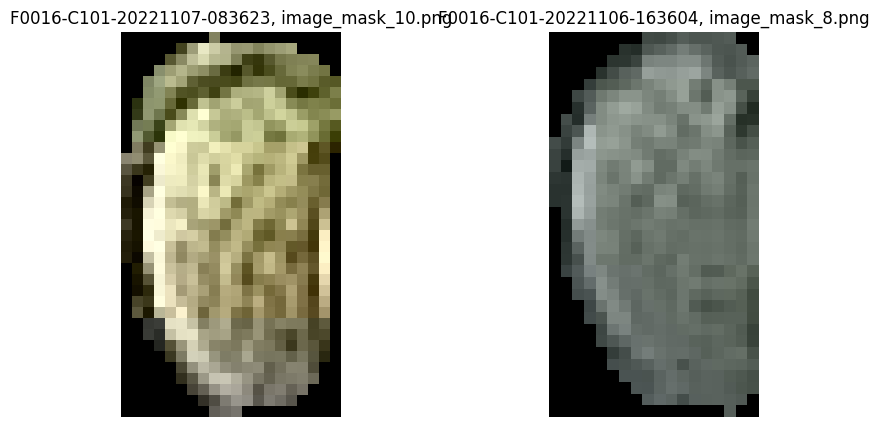

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20221107-083623
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20221106-163604
mask_num_x                                 F0016-C101-20221107-083623_22
mask_id                                 20ebeb7d599f9be31d6a441337da6f70
point_x_x                                                    1304.076172
point_y_x                                                     293.792999
output_image_path_x                                    image_mask_22.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20221106-163604
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

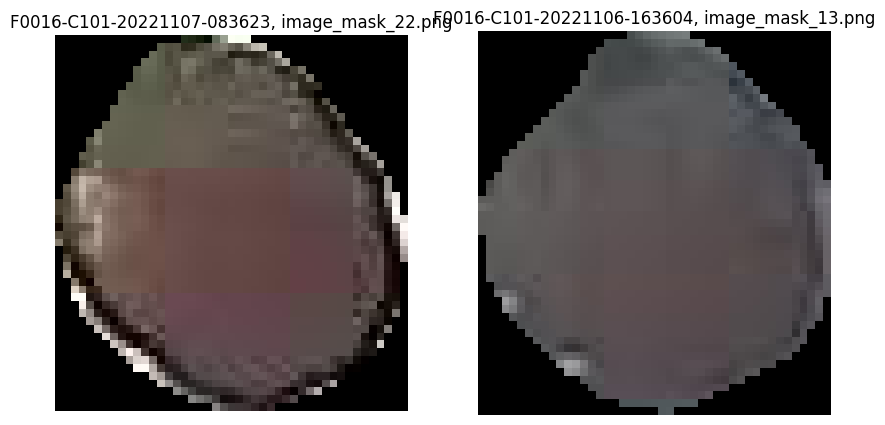

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20221107-083623
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20221106-163604
mask_num_x                                  F0016-C101-20221107-083623_8
mask_id                                 228e6c4111686c6b760724dd2429bac1
point_x_x                                                    1179.841553
point_y_x                                                     297.202026
output_image_path_x                                     image_mask_8.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20221106-163604
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

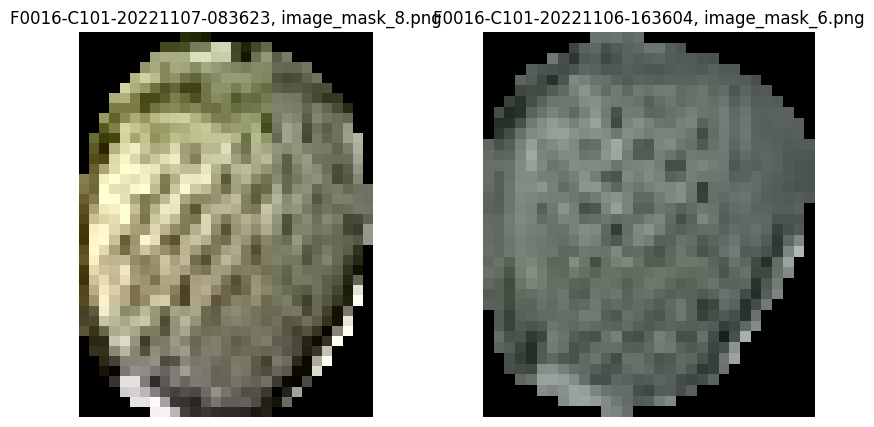

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20221107-083623
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20221106-163604
mask_num_x                                 F0016-C101-20221107-083623_21
mask_id                                 30235607a5b30c45fe3bf7bb90549aba
point_x_x                                                    1535.932495
point_y_x                                                      140.37822
output_image_path_x                                    image_mask_21.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20221106-163604
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

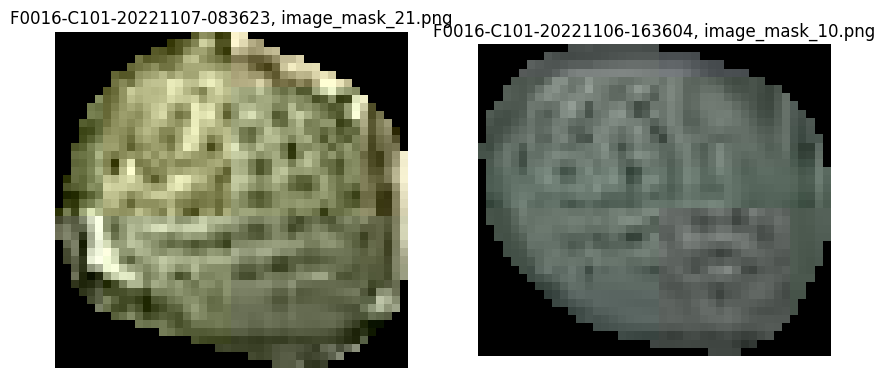

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20221107-083623
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20221106-163604
mask_num_x                                  F0016-C101-20221107-083623_6
mask_id                                 39368a7316ef34fca71ad161fdf1f902
point_x_x                                                     864.074585
point_y_x                                                     420.753479
output_image_path_x                                     image_mask_6.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20221106-163604
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

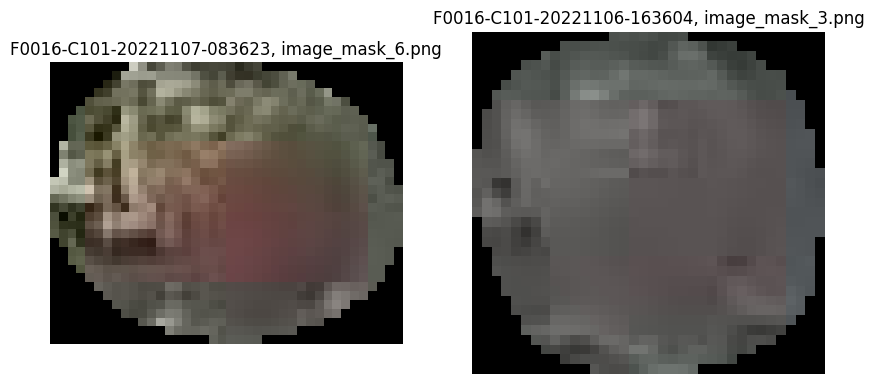

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20221107-083623
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20221106-163604
mask_num_x                                  F0016-C101-20221107-083623_3
mask_id                                 54072daef6b361477ff1ca3860027b20
point_x_x                                                    1092.543091
point_y_x                                                     322.985413
output_image_path_x                                     image_mask_3.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20221106-163604
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

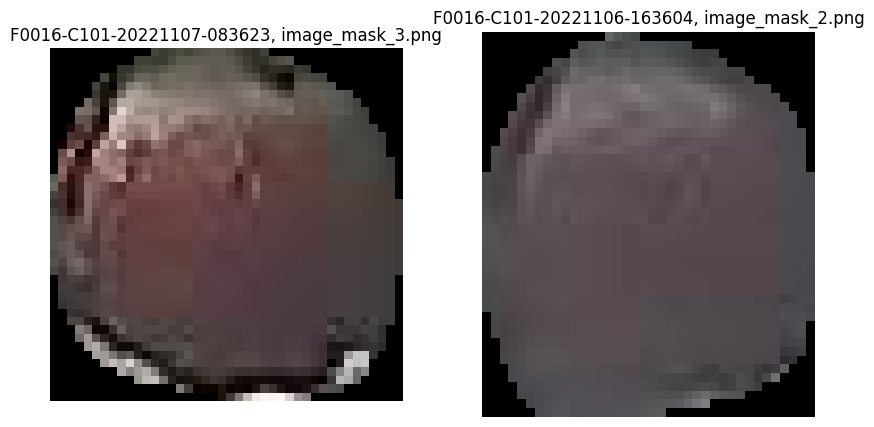

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20221107-083623
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20221106-163604
mask_num_x                                 F0016-C101-20221107-083623_18
mask_id                                 8758d30e86cdbedacdda86b2d93f5ca2
point_x_x                                                    1568.825195
point_y_x                                                     208.202515
output_image_path_x                                    image_mask_18.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20221106-163604
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

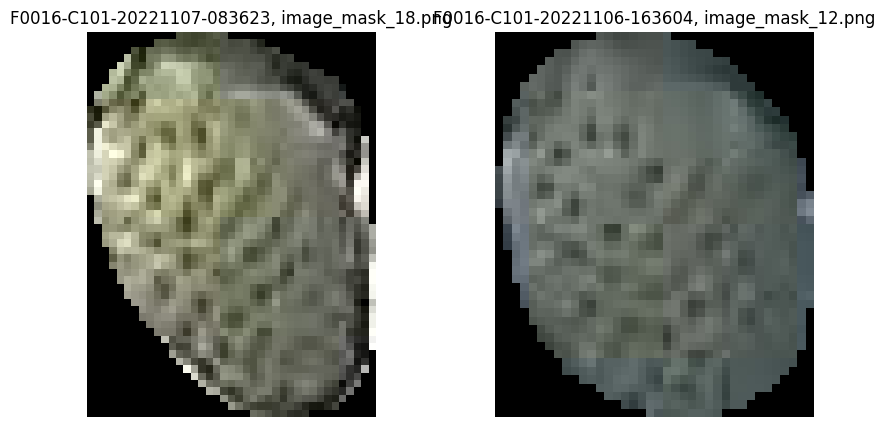

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20221107-083623
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20221106-163604
mask_num_x                                  F0016-C101-20221107-083623_9
mask_id                                 9deda7aea5f8b03a7488466ff5766d0f
point_x_x                                                    1203.655029
point_y_x                                                     262.577332
output_image_path_x                                     image_mask_9.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20221106-163604
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

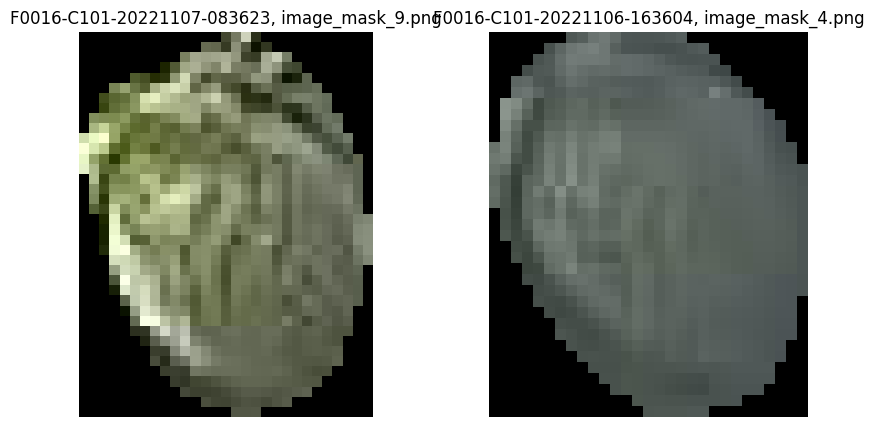

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20221107-083623
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20221106-163604
mask_num_x                                 F0016-C101-20221107-083623_20
mask_id                                 9e3b28875bb33fb933df5a384d32db05
point_x_x                                                    1531.686768
point_y_x                                                     175.092865
output_image_path_x                                    image_mask_20.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20221106-163604
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

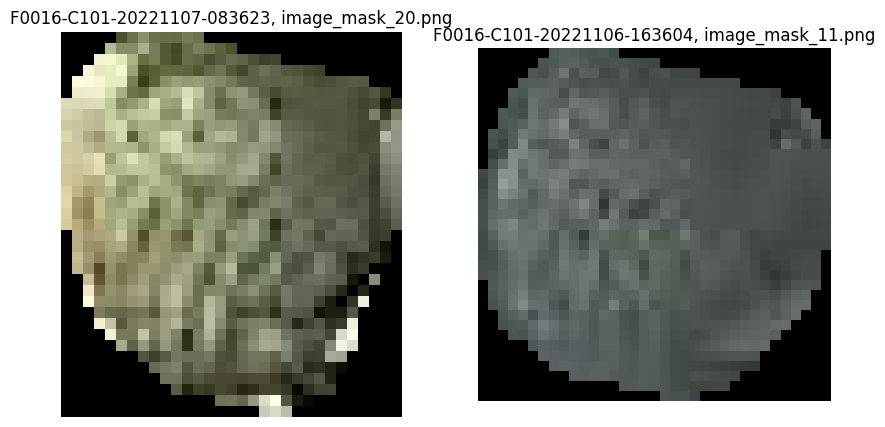

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20221107-083623
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20221106-163604
mask_num_x                                 F0016-C101-20221107-083623_15
mask_id                                 beb0fdda31926d46d473b5d102773824
point_x_x                                                    1399.304932
point_y_x                                                     191.009338
output_image_path_x                                    image_mask_15.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20221106-163604
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

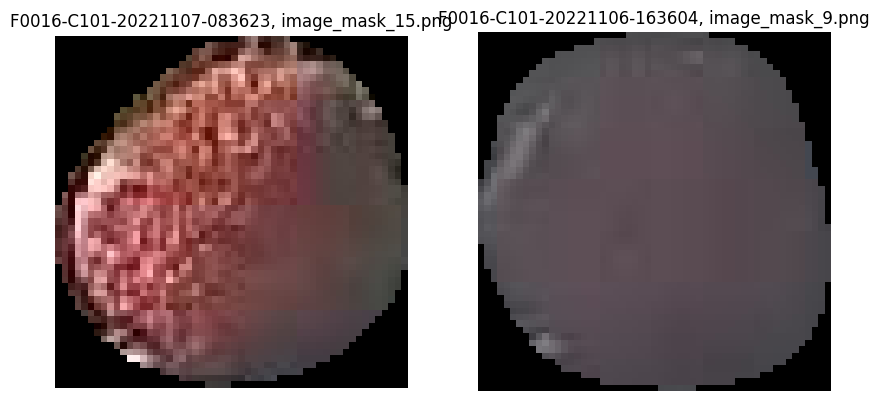

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20221107-083623
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20221106-163604
mask_num_x                                 F0016-C101-20221107-083623_11
mask_id                                 d75809be6c32da4f30b703206ce7c744
point_x_x                                                    1267.199463
point_y_x                                                     272.502106
output_image_path_x                                    image_mask_11.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20221106-163604
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

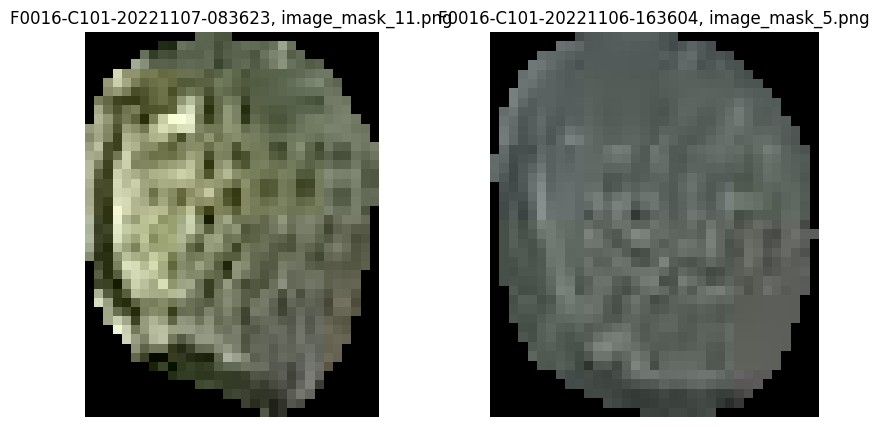

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20221107-083623
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20221106-163604
mask_num_x                                 F0016-C101-20221107-083623_24
mask_id                                 e23cbbba255e27f9cd6d98dd29234b85
point_x_x                                                    2159.326172
point_y_x                                                     423.960266
output_image_path_x                                    image_mask_24.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20221106-163604
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

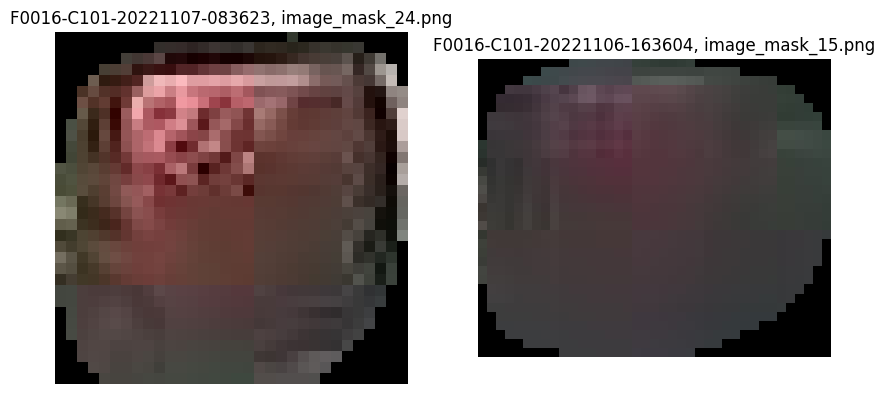

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20221107-083623
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20221106-163604
mask_num_x                                  F0016-C101-20221107-083623_4
mask_id                                 fa654fc90a192f2bf62b3af8f8555bf7
point_x_x                                                     738.579407
point_y_x                                                      442.17572
output_image_path_x                                     image_mask_4.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20221106-163604
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

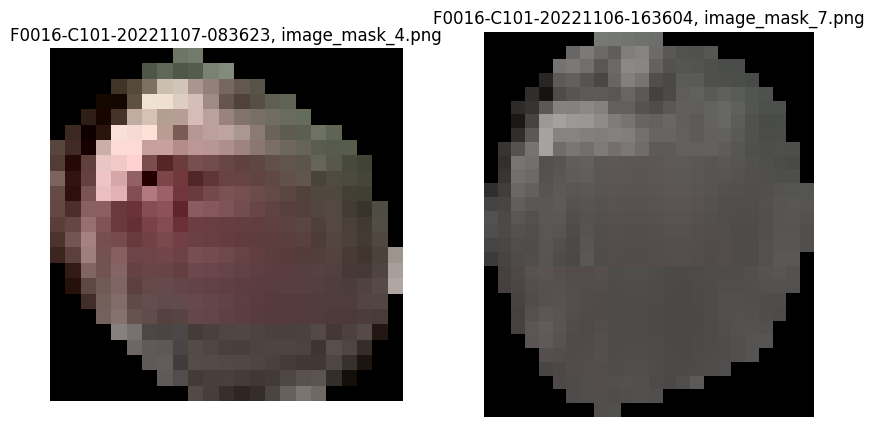

In [91]:
def visualize_mask(df_row, base_folder):
    input_img_name_x = df_row['input_image_name_x']  # 이미지 파일명 가져오기
    input_img_name_y = df_row["input_image_name_y"]

    farm_code_x = df_row["farm_code_x"]
    farm_code_y = df_row["farm_code_y"]
    
    area_code_x = df_row["area_code_x"]
    area_code_y = df_row["area_code_y"]
    
    
    mask_id_x = df_row['output_image_path_x']  # Mask ID 가져오기
    mask_id_y = df_row["output_image_path_y"]
    
    base_folder_x = base_folder + farm_code_x + "/" + area_code_x + "/" + input_img_name_x + "/masks/"
    base_folder_y = base_folder + farm_code_y + "/" + area_code_y + "/" + input_img_name_y + "/masks/"

    # 이미지 파일 경로 생성
    mask_path_x = os.path.join(base_folder_x, mask_id_x)
    mask_path_y = os.path.join(base_folder_y, mask_id_y)

    # 이미지 및 마스크 불러오기
    mask_x = cv2.imread(mask_path_x)
    mask_y = cv2.imread(mask_path_y)

    # 이미지 및 마스크 시각화
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(mask_x, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_x}, {mask_id_x}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(mask_y, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_y}, {mask_id_y}')
    plt.axis('off')

    plt.show()

# 이미지가 저장된 폴더 경로 설정
base_folder = "/home/ubuntu/drive/dataset/SAM_result/"

# 각 행에 대해 visualize_mask 함수 호출
for index, row in nov0506.iterrows():
    if (row["input_image_name_x"] is not np.nan) & (row["input_image_name_y"] is not np.nan):
        print(row)
        print("-"*30)   
        visualize_mask(row, base_folder)


##### 5) 230113 8시 - 230113 12시 비교

In [84]:
### 2022년 11월 데이터 추출해서 확인하기
jan = cdata[(cdata["측정년도"] == 2023) & (cdata["측정월"] == 1)]
jan.head(5)

,check_datetime,측정일자,구역명,farm_code,내부온도,내부습도,내부CO2,근권온도,내부순간일사량,측정년도,...,bbox_image_path,before_img_name,before_img_id,mask_num,mask_id,point_x,point_y,size,color,output_image_path
26021,2023-01-03 12:40:00,2023-01-03,1구역,F0016,20.41,73.54,382.1,14.51,319.28,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221228-123856,f17056b1beaf4ccb071f413952a7d5fb,F0016-C101-20230103-123901_1,9dbf9c6473053be9dd570d55cd21602e,454.567383,199.466629,33593,"[[38, 49, 55], [36, 47, 53], [36, 47, 53], [37...",image_mask_1.png
26022,2023-01-03 12:40:00,2023-01-03,1구역,F0016,20.41,73.54,382.1,14.51,319.28,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221228-123856,f17056b1beaf4ccb071f413952a7d5fb,F0016-C101-20230103-123901_2,a5374527694476cd3ac136ec6214cc55,1004.077759,393.386963,1547,"[[51, 61, 53], [30, 40, 32], [20, 30, 22], [19...",image_mask_2.png
26023,2023-01-03 12:40:00,2023-01-03,1구역,F0016,20.41,73.54,382.1,14.51,319.28,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221228-123856,f17056b1beaf4ccb071f413952a7d5fb,F0016-C101-20230103-123901_3,b4807dcf29b887d139e2361f5937c9c2,1826.302490,172.877975,3849,"[[32, 44, 34], [31, 43, 33], [34, 46, 36], [36...",image_mask_3.png
26024,2023-01-03 12:40:00,2023-01-03,1구역,F0016,20.41,73.54,382.1,14.51,319.28,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221228-123856,f17056b1beaf4ccb071f413952a7d5fb,F0016-C101-20230103-123901_4,b9f032cc07bd24936bc61e37d64d2e2a,1789.593018,179.262054,1906,"[[60, 70, 61], [38, 48, 39], [40, 47, 39], [66...",image_mask_4.png
26025,2023-01-03 12:40:00,2023-01-03,1구역,F0016,20.41,73.54,382.1,14.51,319.28,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20221228-123856,f17056b1beaf4ccb071f413952a7d5fb,F0016-C101-20230103-123901_5,48d026fc621d5be012268a713166c3e5,1696.650757,172.957397,2722,"[[33, 51, 51], [39, 57, 57], [42, 60, 60], [43...",image_mask_5.png


In [85]:
### 전후 딸기 매핑이 잘 되었는지 확인하기 위한 데이터 추출 (20230113 8시 사진)
jan1 = jan[jan["before_img_name"] == "F0016-C101-20230112-164007"]
jan1

,check_datetime,측정일자,구역명,farm_code,내부온도,내부습도,내부CO2,근권온도,내부순간일사량,측정년도,...,bbox_image_path,before_img_name,before_img_id,mask_num,mask_id,point_x,point_y,size,color,output_image_path
26488,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230112-164007,b6bd64d130edb0914bf9328843aa4561,F0016-C101-20230113-083936_1,6f3257faeaebc2b4226dc67a300cf516,373.562317,313.957031,2454,"[[40, 30, 21], [42, 32, 23], [52, 42, 32], [61...",image_mask_1.png
26489,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230112-164007,b6bd64d130edb0914bf9328843aa4561,F0016-C101-20230113-083936_2,461e116278de26b6b540e17fe141235c,1031.817871,378.942139,1335,"[[70, 44, 43], [70, 44, 43], [94, 68, 67], [11...",image_mask_2.png
26490,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230112-164007,b6bd64d130edb0914bf9328843aa4561,F0016-C101-20230113-083936_3,7e14f9e2cb86cf9ae45486e65143970c,1108.197754,499.745453,2325,"[[78, 56, 33], [89, 41, 31], [89, 41, 31], [90...",image_mask_3.png
26491,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230112-164007,b6bd64d130edb0914bf9328843aa4561,F0016-C101-20230113-083936_4,8dc004a0512712405b12c1034650ce1d,1115.376953,454.467346,1490,"[[23, 37, 4], [41, 54, 24], [53, 66, 36], [79,...",image_mask_4.png
26492,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230112-164007,b6bd64d130edb0914bf9328843aa4561,F0016-C101-20230113-083936_5,6365e29f9fd52d9387527ed885e3a2ea,733.367615,483.158325,592,"[[91, 89, 66], [100, 98, 75], [126, 121, 99], ...",image_mask_5.png
26493,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230112-164007,b6bd64d130edb0914bf9328843aa4561,F0016-C101-20230113-083936_6,9ded8875aa2ce1e31dac6600d0b16b60,699.638550,491.972168,818,"[[96, 84, 72], [89, 76, 67], [65, 49, 36], [80...",image_mask_6.png
26494,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230112-164007,b6bd64d130edb0914bf9328843aa4561,F0016-C101-20230113-083936_7,3a3dbea59bf68a65f3ed1853fd3727c6,831.720886,466.634399,1019,"[[96, 69, 52], [96, 69, 52], [95, 66, 50], [91...",image_mask_7.png
26495,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230112-164007,b6bd64d130edb0914bf9328843aa4561,F0016-C101-20230113-083936_8,24483e0a3d4161ad857b60fa1278f4af,974.926331,412.123962,644,"[[88, 80, 59], [34, 26, 5], [77, 69, 48], [88,...",image_mask_8.png
26496,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230112-164007,b6bd64d130edb0914bf9328843aa4561,F0016-C101-20230113-083936_9,bb329288c5db8b61a9985780228adbb6,986.697632,398.441986,747,"[[75, 83, 60], [67, 75, 52], [62, 70, 47], [62...",image_mask_9.png
26497,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230112-164007,b6bd64d130edb0914bf9328843aa4561,F0016-C101-20230113-083936_10,d826c34f7b1f3b455d688a009c9379cb,1006.415161,399.731140,948,"[[93, 101, 77], [93, 101, 77], [99, 107, 83], ...",image_mask_10.png


In [86]:
### 전후 딸기 매핑이 잘 되었는지 확인하기 위한 데이터 추출 (20230113 12시 사진)
jan2 = jan[jan["before_img_name"] == "F0016-C101-20230113-083936"]
jan2

,check_datetime,측정일자,구역명,farm_code,내부온도,내부습도,내부CO2,근권온도,내부순간일사량,측정년도,...,bbox_image_path,before_img_name,before_img_id,mask_num,mask_id,point_x,point_y,size,color,output_image_path
26514,2023-01-13 12:40:00,2023-01-13,1구역,F0016,16.63,94.23,439.6,14.93,76.2,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230113-083936,52e17cd1b61c9fd2df4959f64d8e42a9,F0016-C101-20230113-123755_1,6f3257faeaebc2b4226dc67a300cf516,373.593597,315.171692,2464,"[[51, 42, 27], [36, 27, 12], [22, 13, 0], [19,...",image_mask_1.png
26515,2023-01-13 12:40:00,2023-01-13,1구역,F0016,16.63,94.23,439.6,14.93,76.2,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230113-083936,52e17cd1b61c9fd2df4959f64d8e42a9,F0016-C101-20230113-123755_2,7fff8fea7d0bb1fcd20142726ec6742e,334.620087,432.563721,1029,"[[65, 68, 49], [98, 101, 82], [111, 114, 95], ...",image_mask_2.png
26516,2023-01-13 12:40:00,2023-01-13,1구역,F0016,16.63,94.23,439.6,14.93,76.2,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230113-083936,52e17cd1b61c9fd2df4959f64d8e42a9,F0016-C101-20230113-123755_3,1552d85c2cf0fc206067f4aa42eea303,410.485168,302.081116,3500,"[[64, 58, 42], [67, 61, 45], [67, 61, 45], [71...",image_mask_3.png
26517,2023-01-13 12:40:00,2023-01-13,1구역,F0016,16.63,94.23,439.6,14.93,76.2,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230113-083936,52e17cd1b61c9fd2df4959f64d8e42a9,F0016-C101-20230113-123755_4,b2774c151185f3bf18f102a1b388618d,404.327576,391.185211,2909,"[[90, 100, 75], [82, 92, 67], [74, 84, 59], [7...",image_mask_4.png
26518,2023-01-13 12:40:00,2023-01-13,1구역,F0016,16.63,94.23,439.6,14.93,76.2,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230113-083936,52e17cd1b61c9fd2df4959f64d8e42a9,F0016-C101-20230113-123755_5,b540d8861149d2000cf72b7270f7a3c4,493.296631,294.136688,2230,"[[82, 89, 58], [66, 73, 42], [107, 114, 80], [...",image_mask_5.png
26519,2023-01-13 12:40:00,2023-01-13,1구역,F0016,16.63,94.23,439.6,14.93,76.2,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230113-083936,52e17cd1b61c9fd2df4959f64d8e42a9,F0016-C101-20230113-123755_6,f553791a33cc10d05b2e1359e88106ff,452.889282,237.522400,1554,"[[75, 59, 46], [77, 61, 48], [62, 46, 33], [66...",image_mask_6.png
26520,2023-01-13 12:40:00,2023-01-13,1구역,F0016,16.63,94.23,439.6,14.93,76.2,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230113-083936,52e17cd1b61c9fd2df4959f64d8e42a9,F0016-C101-20230113-123755_7,b2b2d27966579e9b84e63bbdb6b591ec,415.601349,182.366821,4712,"[[78, 81, 62], [73, 79, 53], [72, 78, 52], [72...",image_mask_7.png
26521,2023-01-13 12:40:00,2023-01-13,1구역,F0016,16.63,94.23,439.6,14.93,76.2,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230113-083936,52e17cd1b61c9fd2df4959f64d8e42a9,F0016-C101-20230113-123755_8,be5323ace8a4eacc87575f775fcfde8e,459.291382,318.647339,1406,"[[77, 86, 57], [74, 77, 48], [92, 101, 72], [8...",image_mask_8.png
26522,2023-01-13 12:40:00,2023-01-13,1구역,F0016,16.63,94.23,439.6,14.93,76.2,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230113-083936,52e17cd1b61c9fd2df4959f64d8e42a9,F0016-C101-20230113-123755_9,7e14f9e2cb86cf9ae45486e65143970c,1108.412598,492.133545,2054,"[[30, 18, 0], [11, 0, 0], [45, 24, 7], [39, 18...",image_mask_9.png
26523,2023-01-13 12:40:00,2023-01-13,1구역,F0016,16.63,94.23,439.6,14.93,76.2,2023.0,...,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230113-083936,52e17cd1b61c9fd2df4959f64d8e42a9,F0016-C101-20230113-123755_10,461e116278de26b6b540e17fe141235c,1032.170898,379.523590,1321,"[[41, 18, 12], [33, 10, 4], [46, 23, 17], [53,...",image_mask_10.png


In [87]:
jan0812 = pd.merge(jan1, jan2, on="mask_id", how="outer")
jan0812

,check_datetime_x,측정일자_x,구역명_x,farm_code_x,내부온도_x,내부습도_x,내부CO2_x,근권온도_x,내부순간일사량_x,측정년도_x,...,count_masks_y,bbox_image_path_y,before_img_name_y,before_img_id_y,mask_num_y,point_x_y,point_y_y,size_y,color_y,output_image_path_y
0,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,34.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230113-083936,52e17cd1b61c9fd2df4959f64d8e42a9,F0016-C101-20230113-123755_22,1799.864990,458.652039,625.0,"[[25, 33, 18], [0, 4, 0], [2, 10, 0], [0, 4, 0...",image_mask_22.png
2,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,34.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230113-083936,52e17cd1b61c9fd2df4959f64d8e42a9,F0016-C101-20230113-123755_19,1855.627319,106.088333,3215.0,"[[95, 89, 63], [65, 58, 32], [34, 27, 1], [23,...",image_mask_19.png
4,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230113-083936,52e17cd1b61c9fd2df4959f64d8e42a9,F0016-C101-20230113-123755_3,410.485168,302.081116,3500.0,"[[64, 58, 42], [67, 61, 45], [67, 61, 45], [71...",image_mask_3.png
6,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,34.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230113-083936,52e17cd1b61c9fd2df4959f64d8e42a9,F0016-C101-20230113-123755_26,1992.676025,51.879417,3518.0,"[[49, 39, 38], [63, 49, 46], [67, 53, 50], [58...",image_mask_26.png
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20230113-083936,52e17cd1b61c9fd2df4959f64d8e42a9,F0016-C101-20230113-123755_18,1171.714355,525.478394,614.0,"[[85, 83, 62], [113, 111, 88], [51, 49, 24], [...",image_mask_18.png
9,2023-01-13 08:40:00,2023-01-13,1구역,F0016,13.29,95.3,939.75,15.23,3.65,2023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
jan0812.drop(['check_datetime_x', '측정일자_x', '내부온도_x',
       '내부습도_x', '내부CO2_x', '근권온도_x', '내부순간일사량_x', '측정년도_x', '측정월_x',
       'img_id_x', "구역명_x", 
       'shot_datetime_x', 'count_masks_x', 'bbox_image_path_x',
       'before_img_id_x', 'size_x', 'color_x',
       'check_datetime_y', '측정일자_y', '내부온도_y',
       '내부습도_y', '내부CO2_y', '근권온도_y', '내부순간일사량_y', '측정년도_y', '측정월_y',
       'img_id_y', "구역명_y", 
       'shot_datetime_y', 'count_masks_y', 'bbox_image_path_y',
       'size_y', 'color_y',], axis=1, inplace=True)

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                 F0016-C101-20230113-083936_15
mask_id                                 0809b3c7b2e8c23471257c0cae219f41
point_x_x                                                    1799.755371
point_y_x                                                     457.217468
output_image_path_x                                    image_mask_15.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

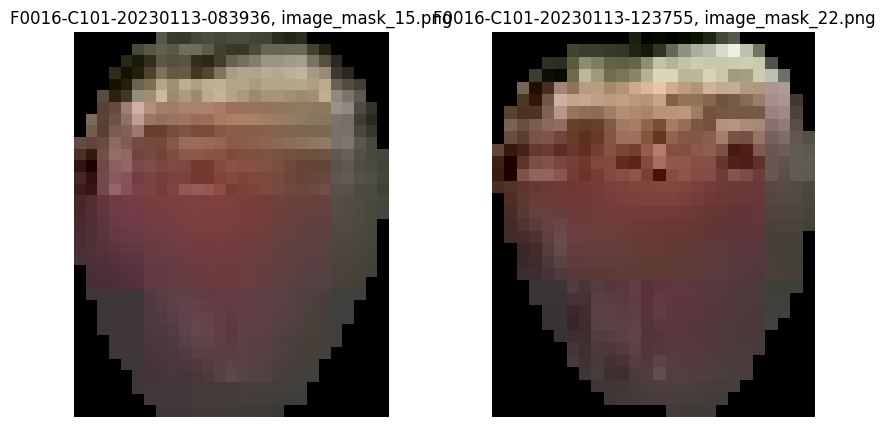

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                 F0016-C101-20230113-083936_14
mask_id                                 0ddd00cfaa1217fc755d8016c3be51c6
point_x_x                                                    1856.802979
point_y_x                                                     105.404327
output_image_path_x                                    image_mask_14.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

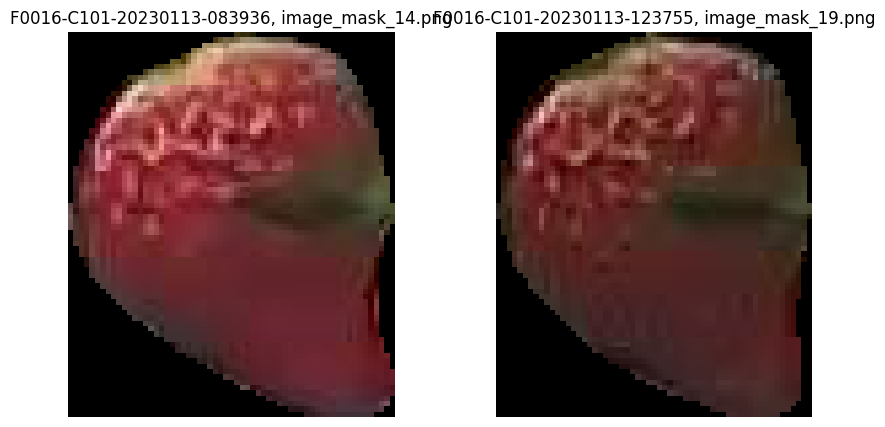

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                 F0016-C101-20230113-083936_19
mask_id                                 269b20b24fd6b78fedf3421859f09cb2
point_x_x                                                    1992.130127
point_y_x                                                      50.406025
output_image_path_x                                    image_mask_19.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

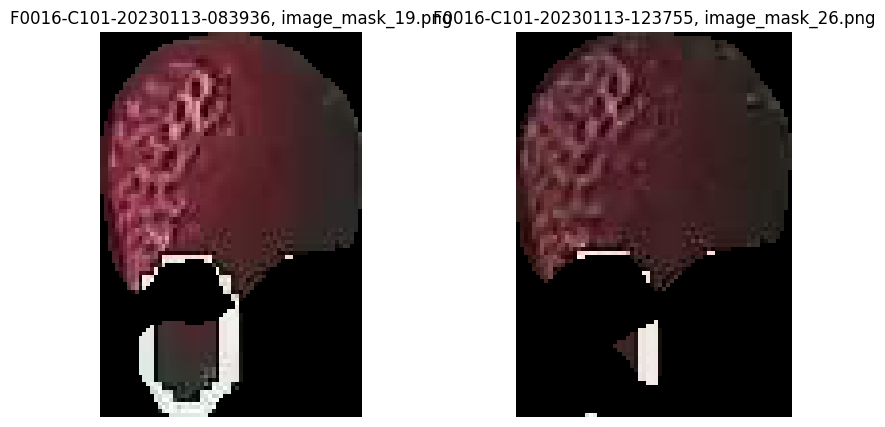

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                 F0016-C101-20230113-083936_13
mask_id                                 3ff2a70206b4f6470c4449b56f811499
point_x_x                                                    1899.669189
point_y_x                                                     123.887512
output_image_path_x                                    image_mask_13.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

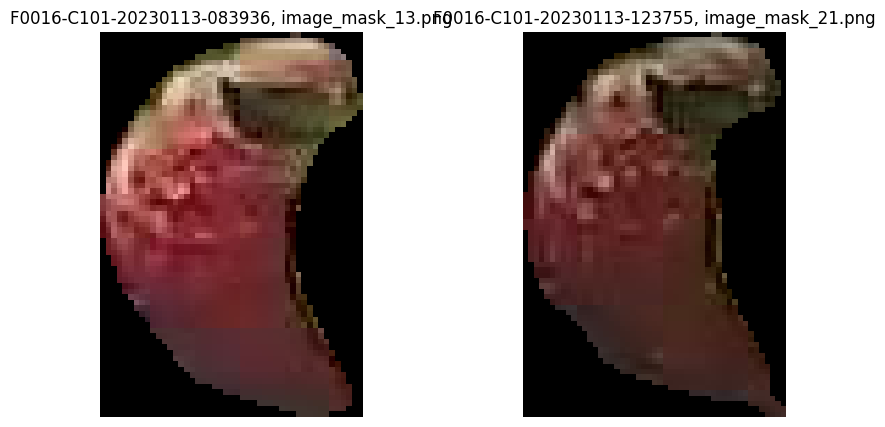

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                 F0016-C101-20230113-083936_20
mask_id                                 409d1a5ef70fd18b0ab54d1aac294bcd
point_x_x                                                    2043.119629
point_y_x                                                     160.667099
output_image_path_x                                    image_mask_20.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

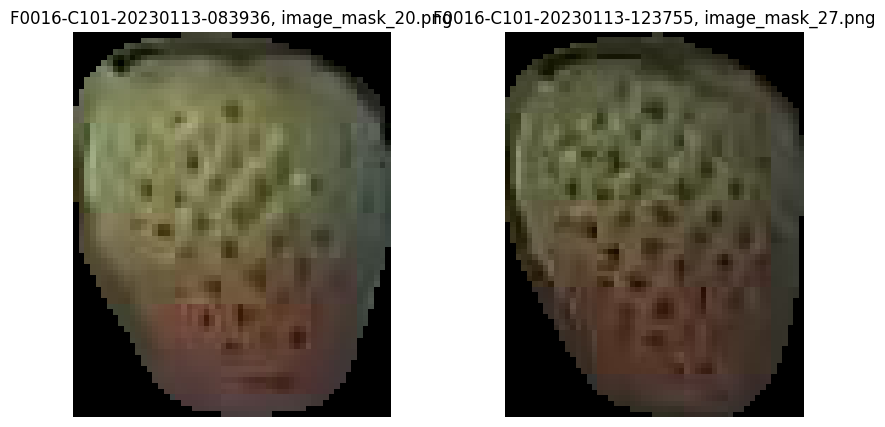

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                  F0016-C101-20230113-083936_2
mask_id                                 461e116278de26b6b540e17fe141235c
point_x_x                                                    1031.817871
point_y_x                                                     378.942139
output_image_path_x                                     image_mask_2.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

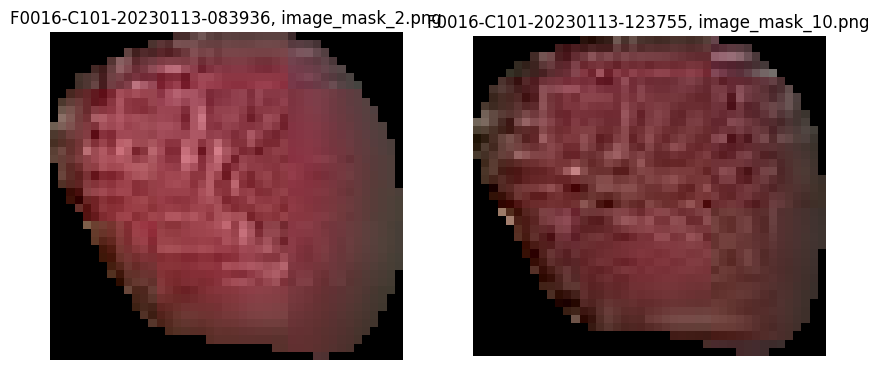

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                  F0016-C101-20230113-083936_5
mask_id                                 6365e29f9fd52d9387527ed885e3a2ea
point_x_x                                                     733.367615
point_y_x                                                     483.158325
output_image_path_x                                     image_mask_5.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

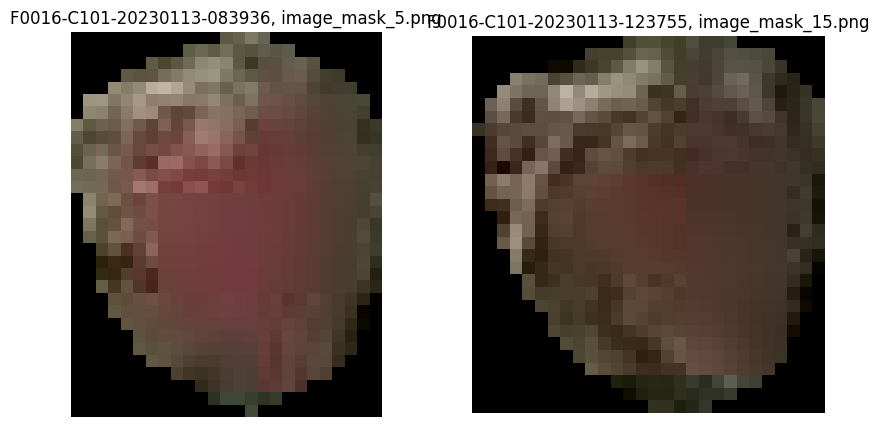

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                  F0016-C101-20230113-083936_1
mask_id                                 6f3257faeaebc2b4226dc67a300cf516
point_x_x                                                     373.562317
point_y_x                                                     313.957031
output_image_path_x                                     image_mask_1.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

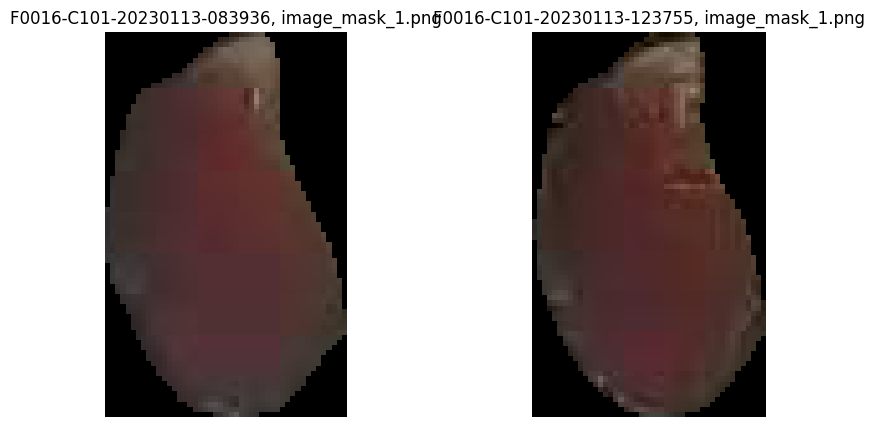

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                  F0016-C101-20230113-083936_3
mask_id                                 7e14f9e2cb86cf9ae45486e65143970c
point_x_x                                                    1108.197754
point_y_x                                                     499.745453
output_image_path_x                                     image_mask_3.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

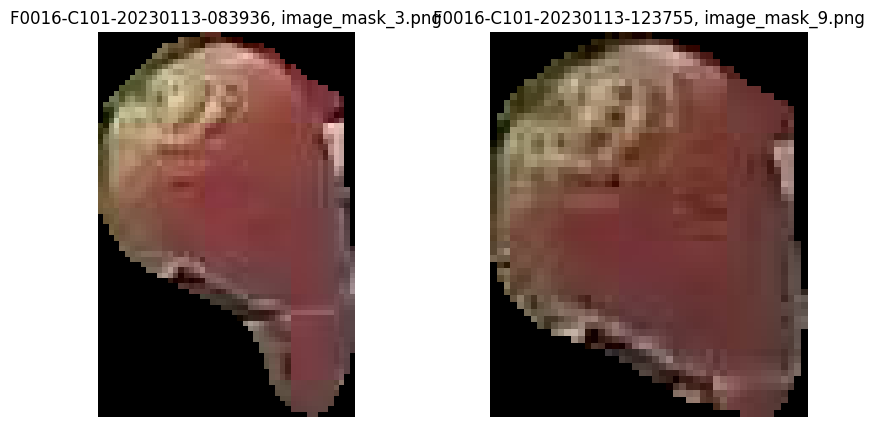

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                 F0016-C101-20230113-083936_11
mask_id                                 7e14f9e2cb86cf9ae45486e65143970c
point_x_x                                                     1107.23877
point_y_x                                                     490.034698
output_image_path_x                                    image_mask_11.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

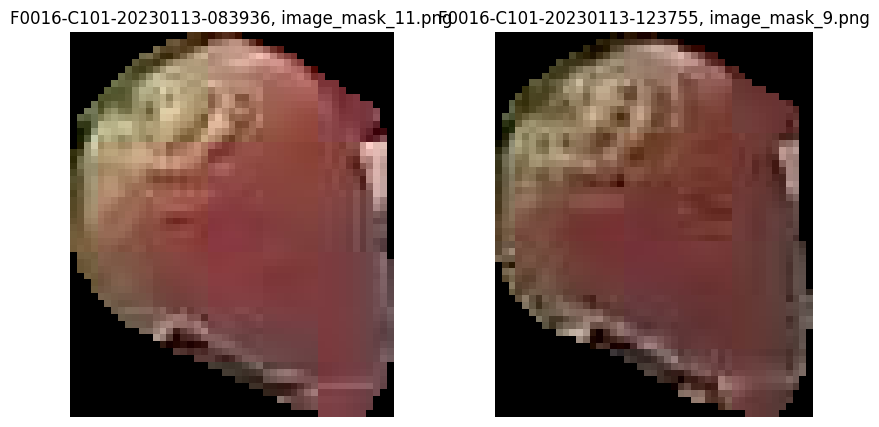

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                 F0016-C101-20230113-083936_21
mask_id                                 85f616225272e29fc87180e7382d9294
point_x_x                                                    2049.718262
point_y_x                                                     115.980804
output_image_path_x                                    image_mask_21.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

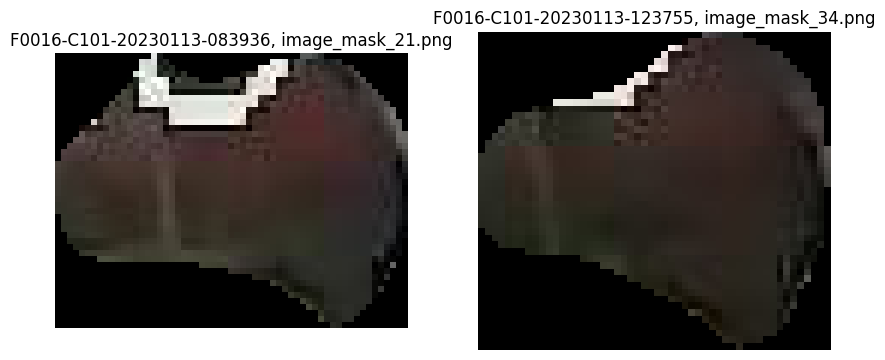

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                  F0016-C101-20230113-083936_4
mask_id                                 8dc004a0512712405b12c1034650ce1d
point_x_x                                                    1115.376953
point_y_x                                                     454.467346
output_image_path_x                                     image_mask_4.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

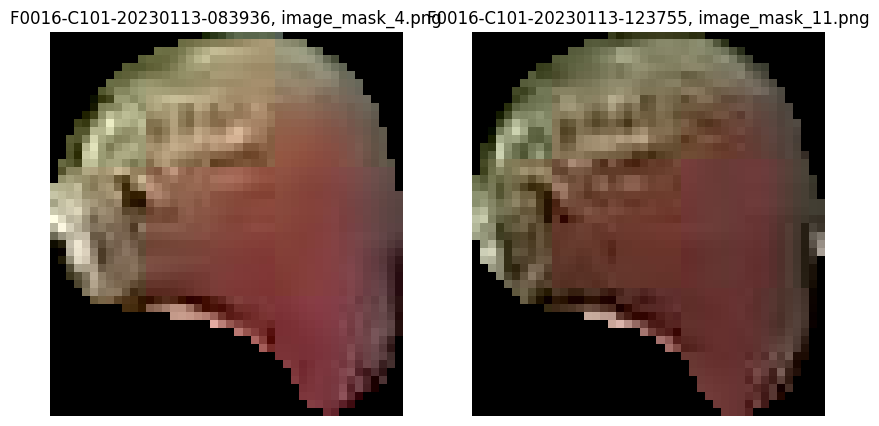

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                  F0016-C101-20230113-083936_6
mask_id                                 9ded8875aa2ce1e31dac6600d0b16b60
point_x_x                                                      699.63855
point_y_x                                                     491.972168
output_image_path_x                                     image_mask_6.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

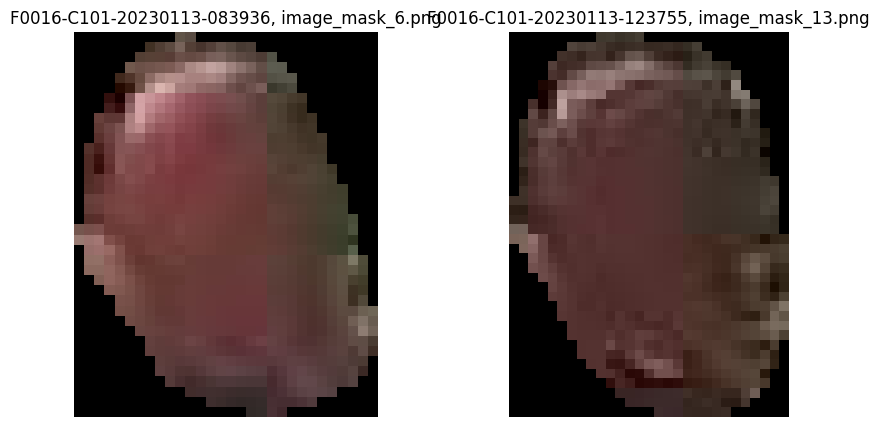

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                 F0016-C101-20230113-083936_12
mask_id                                 b9f032cc07bd24936bc61e37d64d2e2a
point_x_x                                                    1803.885986
point_y_x                                                     198.497757
output_image_path_x                                    image_mask_12.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

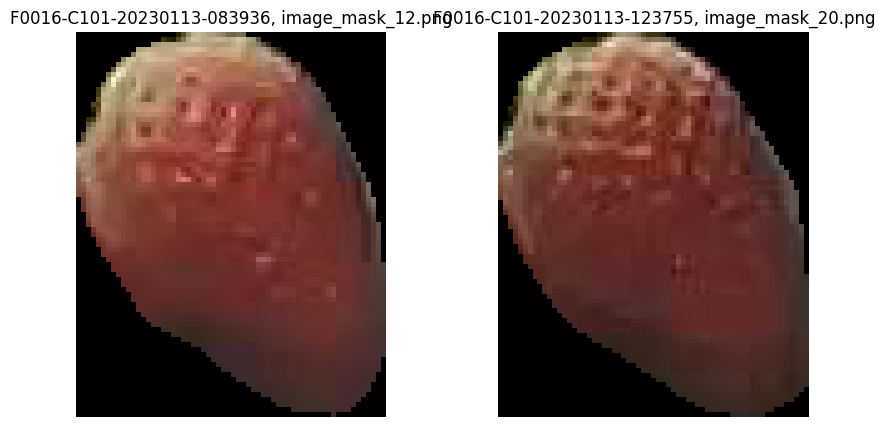

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                  F0016-C101-20230113-083936_9
mask_id                                 bb329288c5db8b61a9985780228adbb6
point_x_x                                                     986.697632
point_y_x                                                     398.441986
output_image_path_x                                     image_mask_9.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

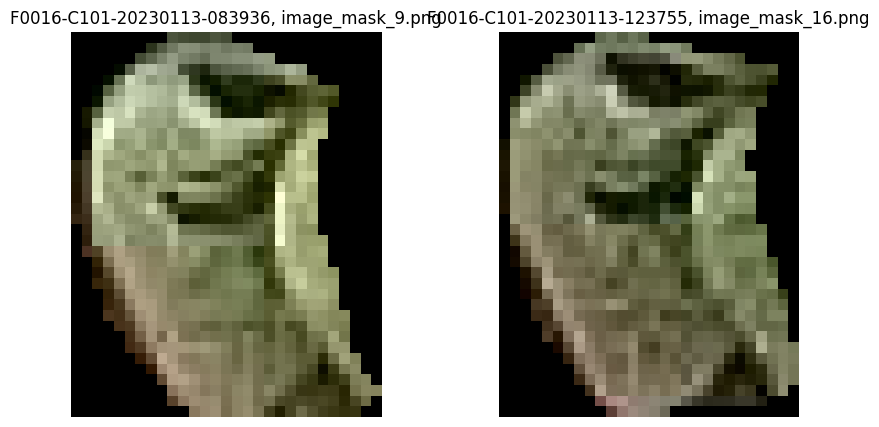

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                 F0016-C101-20230113-083936_25
mask_id                                 bca12b6be41a0155d74e9e3ca3a37263
point_x_x                                                    1943.809814
point_y_x                                                     133.188034
output_image_path_x                                    image_mask_25.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

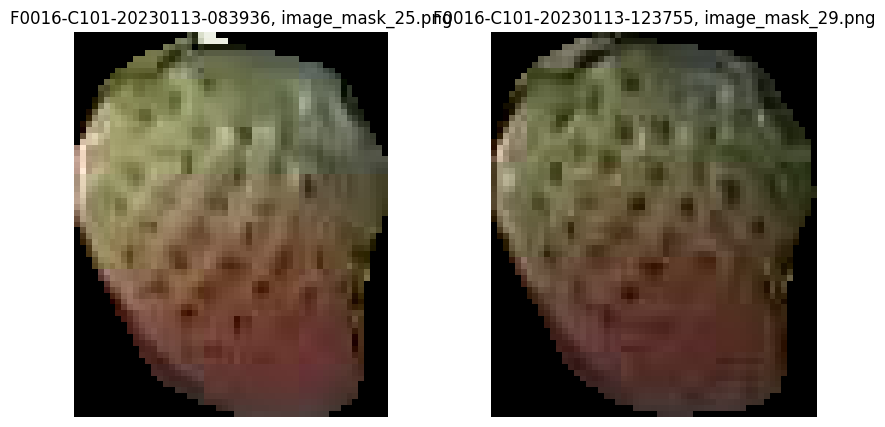

farm_code_x                                                        F0016
input_image_name_x                            F0016-C101-20230113-083936
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0016-C101-20230112-164007
mask_num_x                                 F0016-C101-20230113-083936_10
mask_id                                 d826c34f7b1f3b455d688a009c9379cb
point_x_x                                                    1006.415161
point_y_x                                                      399.73114
output_image_path_x                                    image_mask_10.png
farm_code_y                                                        F0016
input_image_name_y                            F0016-C101-20230113-123755
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0016/C101/F0...
area_code_y                                        

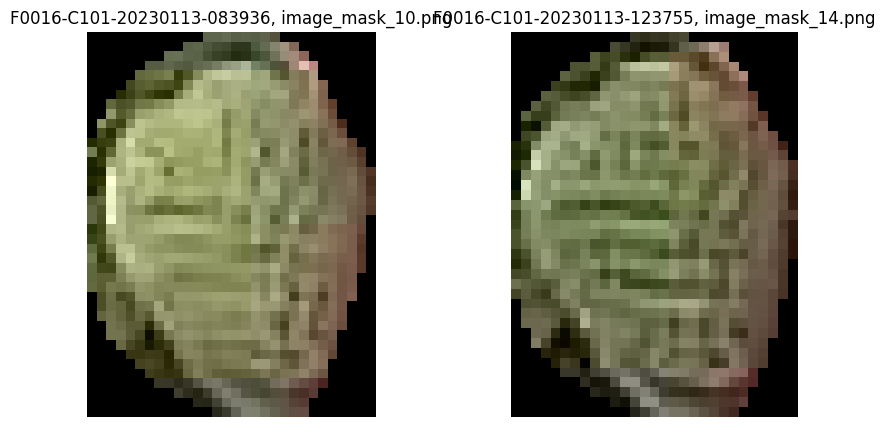

In [92]:
# 각 행에 대해 visualize_mask 함수 호출
for index, row in jan0812.iterrows():
    if (row["input_image_name_x"] is not np.nan) & (row["input_image_name_y"] is not np.nan):
        print(row)
        print("-"*30)   
        visualize_mask(row, base_folder)